An analysis of sarc_emojis_1000 and not_sarc_emojis_1000 datasets. similar to the reddit analysis.

In [ ]:
!pip install WordCloud -U
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 50.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4f4959ddcdcc2ca5f0a831a52f629d4330691e78ce80e189b1315245c4430091
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which 

In [ ]:
! gdown 1X1jZgrRaVH-h0xX3k8cSzT0kumIVlmwx #sarc_emojis_1000.csv
! gdown 1--LLxkODAryG3TgUHrcggfrYoXnr9UFe #not_sarc_emojis_1000.csv

Downloading...
From: https://drive.google.com/uc?id=1X1jZgrRaVH-h0xX3k8cSzT0kumIVlmwx
To: /content/sarc_emojis_1000.csv
100% 1.60M/1.60M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--LLxkODAryG3TgUHrcggfrYoXnr9UFe
To: /content/not_sarc_emojis_1000.csv
100% 1.68M/1.68M [00:00<00:00, 168MB/s]


In [ ]:
import pandas as pd
sarc = pd.read_csv('sarc_emojis_1000.csv')
not_sarc = pd.read_csv('not_sarc_emojis_1000.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


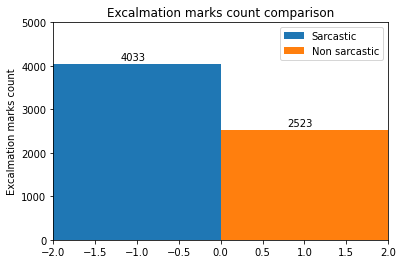

In [ ]:
import matplotlib.pyplot as plt

sarc_excal_count = 0
non_sarc_excal_count = 0
for com in sarc['text']:
  if '!' in com:
      sarc_excal_count += 1
for com in not_sarc['text']:
  if '!' in com:
    non_sarc_excal_count += 1


fig, ax = plt.subplots()
plt.bar(-1, sarc_excal_count, 2, label='Sarcastic')
plt.bar(1, non_sarc_excal_count, 2, label='Non sarcastic')
plt.axis([-2, 2, 0, 5000])
ax.set_xticks([-1,1], ['sarcastic', 'non sarcastic'])

ax.annotate(str(sarc_excal_count),(-1.2,sarc_excal_count+100))
ax.annotate(str(non_sarc_excal_count),(0.8,non_sarc_excal_count+100))
ax.set_ylabel('Excalmation marks count')
ax.set_title('Excalmation marks count comparison')
ax.legend()

plt.show()

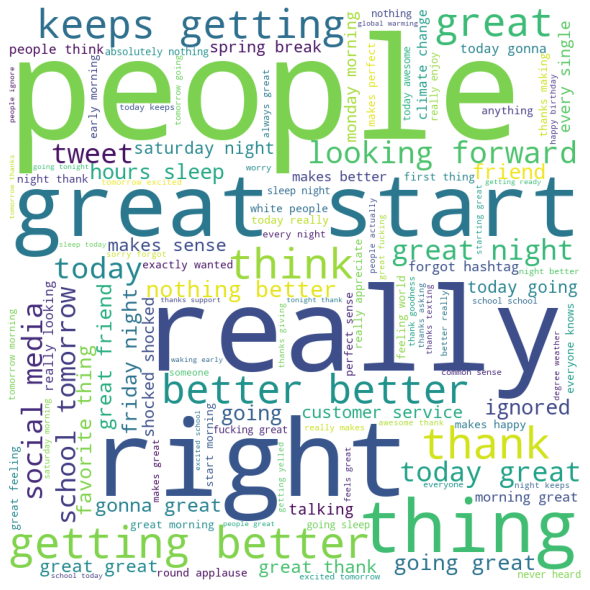

In [ ]:
from wordcloud import WordCloud, STOPWORDS

sarc_words = ''
stopwords = set(STOPWORDS)
 
for sarc_com in sarc['text']:

    tokens = [w.lower() for w in sarc_com.split()]         
    sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=5, collocation_threshold=3,
                min_font_size = 10).generate(sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

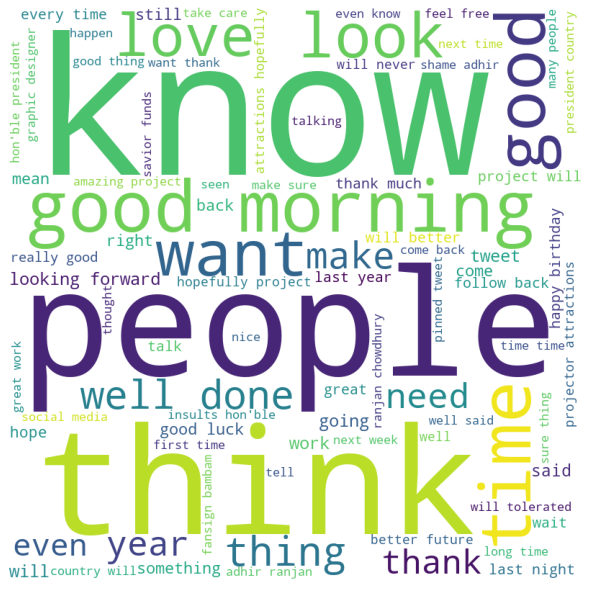

In [ ]:
non_sarc_words = ''
for non_sarc_com in not_sarc['text']:

    tokens = [w.lower() for w in non_sarc_com.split()]         
    non_sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=4, collocation_threshold=3,
                min_font_size = 10).generate(non_sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

X = []
Y = []

for x in sarc['text']:
  if type(x) is str and len(x) < 150:
    X.append(x.lower())
    Y.append(1)
    
for x in not_sarc['text']:
  if type(x) is str and len(x) < 150:
    X.append(x.lower())
    Y.append(0)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)
lr_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),('clf',  LogisticRegression(penalty = 'l2', random_state= 42, solver='liblinear'))])
lr_clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [ ]:
print(f"The accuracy on the training set is: {lr_clf.score(X_train,Y_train)}")
print(f"The accuracy on the test set is:  {lr_clf.score(X_test,Y_test)}")

The accuracy on the training set is: 0.889933181584551
The accuracy on the test set is:  0.7368942731277534


In [ ]:
Y_pred = lr_clf.predict(X_test)
report = classification_report(Y_pred,Y_test, output_dict=True)
report = pd.DataFrame(report).transpose()
report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
report

,precision,recall,f1-score,support
Sarcastic Comments,0.661623,0.759674,0.707266,3799.000000
Non Sarcastic Comments,0.806486,0.720507,0.761076,5281.000000
accuracy,0.736894,0.736894,0.736894,0.736894
macro avg,0.734054,0.740091,0.734171,9080.000000
weighted avg,0.745876,0.736894,0.738562,9080.000000


In [ ]:
import eli5
eli5.explain_weights(lr_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+7.644,love
+5.552,yay
+4.451,so
+4.394,oh
+4.354,great
+4.249,fun
+4.048,glad
+3.919,being
+3.824,today
+3.815,tonight


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 163 kB 58.4 MB/s 
     |████████████████████████████████| 7.6 MB 38.7 MB/s 


In [ ]:
from transformers import pipeline

model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sarc_sentiment = classifier(sarc['text'].tolist())
non_sarc_sentiment = classifier(not_sarc['text'].tolist())

sarc_pos = [x['score'] for x in sarc_sentiment if x['label'] == 'Positive']
sarc_neg = [x['score'] for x in sarc_sentiment if x['label'] == 'Negative']
sarc_neu = [x['score'] for x in sarc_sentiment if x['label'] == 'Neutral']
non_sarc_pos = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Positive']
non_sarc_neg = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Negative']
non_sarc_neu = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Neutral']

#my_bar_plot(['S','N'],[sarc_pos_mean,non_sarc_pos_mean],[sarc_neg_mean,non_sarc_pos_mean],'Positive','Negative','Sentiment','sentiment comparison')


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import numpy as np

print("Positive sarcasm:    ",len(sarc_pos), "  Avarage score:", np.mean(sarc_pos))
print("Neutral sarcasm:     ",len(sarc_neu), "  Avarage score:", np.mean(sarc_neg))
print("Negative sarcasm:    ",len(sarc_neg), "  Avarage score:", np.mean(sarc_neg))
print("Positive non sarcasm:",len(non_sarc_pos), "  Avarage score:", np.mean(non_sarc_pos))
print("Neutral non sarcasm:",len(non_sarc_neu), "  Avarage score:", np.mean(non_sarc_pos))
print("Negative non sarcasm:",len(non_sarc_neg), "  Avarage score:", np.mean(non_sarc_neg))

Positive sarcasm:     9823   Avarage score: 0.8738137919663971
Neutral sarcasm:      4444   Avarage score: 0.7381910503316088
Negative sarcasm:     5733   Avarage score: 0.7381910503316088
Positive non sarcasm: 5931   Avarage score: 0.8598355065156268
Neutral non sarcasm: 7623   Avarage score: 0.8598355065156268
Negative non sarcasm: 6446   Avarage score: 0.7611401702467788
